In [2]:
from layerwise_activations import store_layerwise_activations
from utils import set_up_dir, ReportInterface
import matplotlib.pyplot as plt
import h5py
import caffe
import numpy as np
import lmdb
%matplotlib inline

In [ ]:
# ACTIVITY
date = '2408'
snap = '390000'
caffemodels =  ['/mnt/antares_raid/home/oliver/Experiments/{}/R/snapshots/_iter_{}.caffemodel'.format(date,snap),
                '/mnt/antares_raid/home/oliver/Experiments/{}/UR/snapshots/_iter_{}.caffemodel'.format(date,snap),
                '/mnt/antares_raid/home/oliver/Experiments/{}/N25NR/snapshots/_iter_{}.caffemodel'.format(date,snap),
                '/mnt/antares_raid/home/oliver/Experiments/{}/N25NUR/snapshots/_iter_{}.caffemodel'.format(date,snap),
                '/mnt/antares_raid/home/oliver/Experiments/{}/N50NR/snapshots/_iter_{}.caffemodel'.format(date,snap),
                '/mnt/antares_raid/home/oliver/Experiments/{}/N50NUR/snapshots/_iter_{}.caffemodel'.format(date,snap)
                ]
phase = caffe.TRAIN
net_prototxt = '/mnt/antares_raid/home/oliver/Experiments/{}/MLP/AER/MLP_net.prototxt'.format(date)
keys=['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron'] 
model = '/mnt/antares_raid/home/oliver/Experiments/{}/R/snapshots/_iter_{}.caffemodel'.format(date,snap)

lmdb_path = '/mnt/raid/dnn/data_oliver/lmdb/MNIST_TRAIN_60000_rot_lmdb/shuffled/'
keys = ['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron']
n = 780
dst_fpath= '/mnt/antares_raid/home/oliver/Experiments/{}/R/activations/activity.hdf5'.format(date)

In [ ]:
store_layerwise_activations(net_prototxt, model, phase, keys, n, dst_fpath)

In [ ]:
#ROTATION ANGLES
rot_lmdb_path =  '/mnt/raid/dnn/data_oliver/lmdb/MNIST_TRAIN_60000_rot_ang_lmdb/shuffled/'

lmdb_env = lmdb.open(rot_lmdb_path)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
R = []
im_count = 0
for key, value in lmdb_cursor:
        R.append(value)
Rot = np.asarray([float(r) for r in R])
Rot = Rot - np.min(Rot)
Rot = Rot/np.max(Rot)
    

In [ ]:
# CORRELATIONS
dst_fpath='/mnt/antares_raid/home/oliver/Experiments/R/activations/activity.hdf5'
keys = ['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron']

import scipy 
C = {k:{} for k in keys}
with h5py.File(dst_fpath, "r") as f: #f[k]: n*batchsize x 784
    for k in f:
        print(k)
        for nr, r in enumerate(list(set(Rot))):
            print(r)
            Rot_r = np.copy(Rot)
            Rot_r[Rot_r != r] = 0.
            C[k].update({str(r): np.array([scipy.stats.pearsonr(Rot_r,f[k][:,i] ) for i in range(f[k].shape[1] )] )})


## Activity distributions

In [4]:

date = '2408'
snap = '390000'
dst_fpath= '/mnt/antares_raid/home/oliver/Experiments/{}/R/activations/activity.hdf5'.format(date)
keys = ['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron']

dst_fpath= '/mnt/antares_raid/home/oliver/Experiments/{}/R/activations/activity.hdf5'.format(date)

S = ReportInterface()
#S.__save_dict_to_hdf5__(C, dst_fpath)

CL = S.__load_dict_from_hdf5__(dst_fpath)


encode1neuron


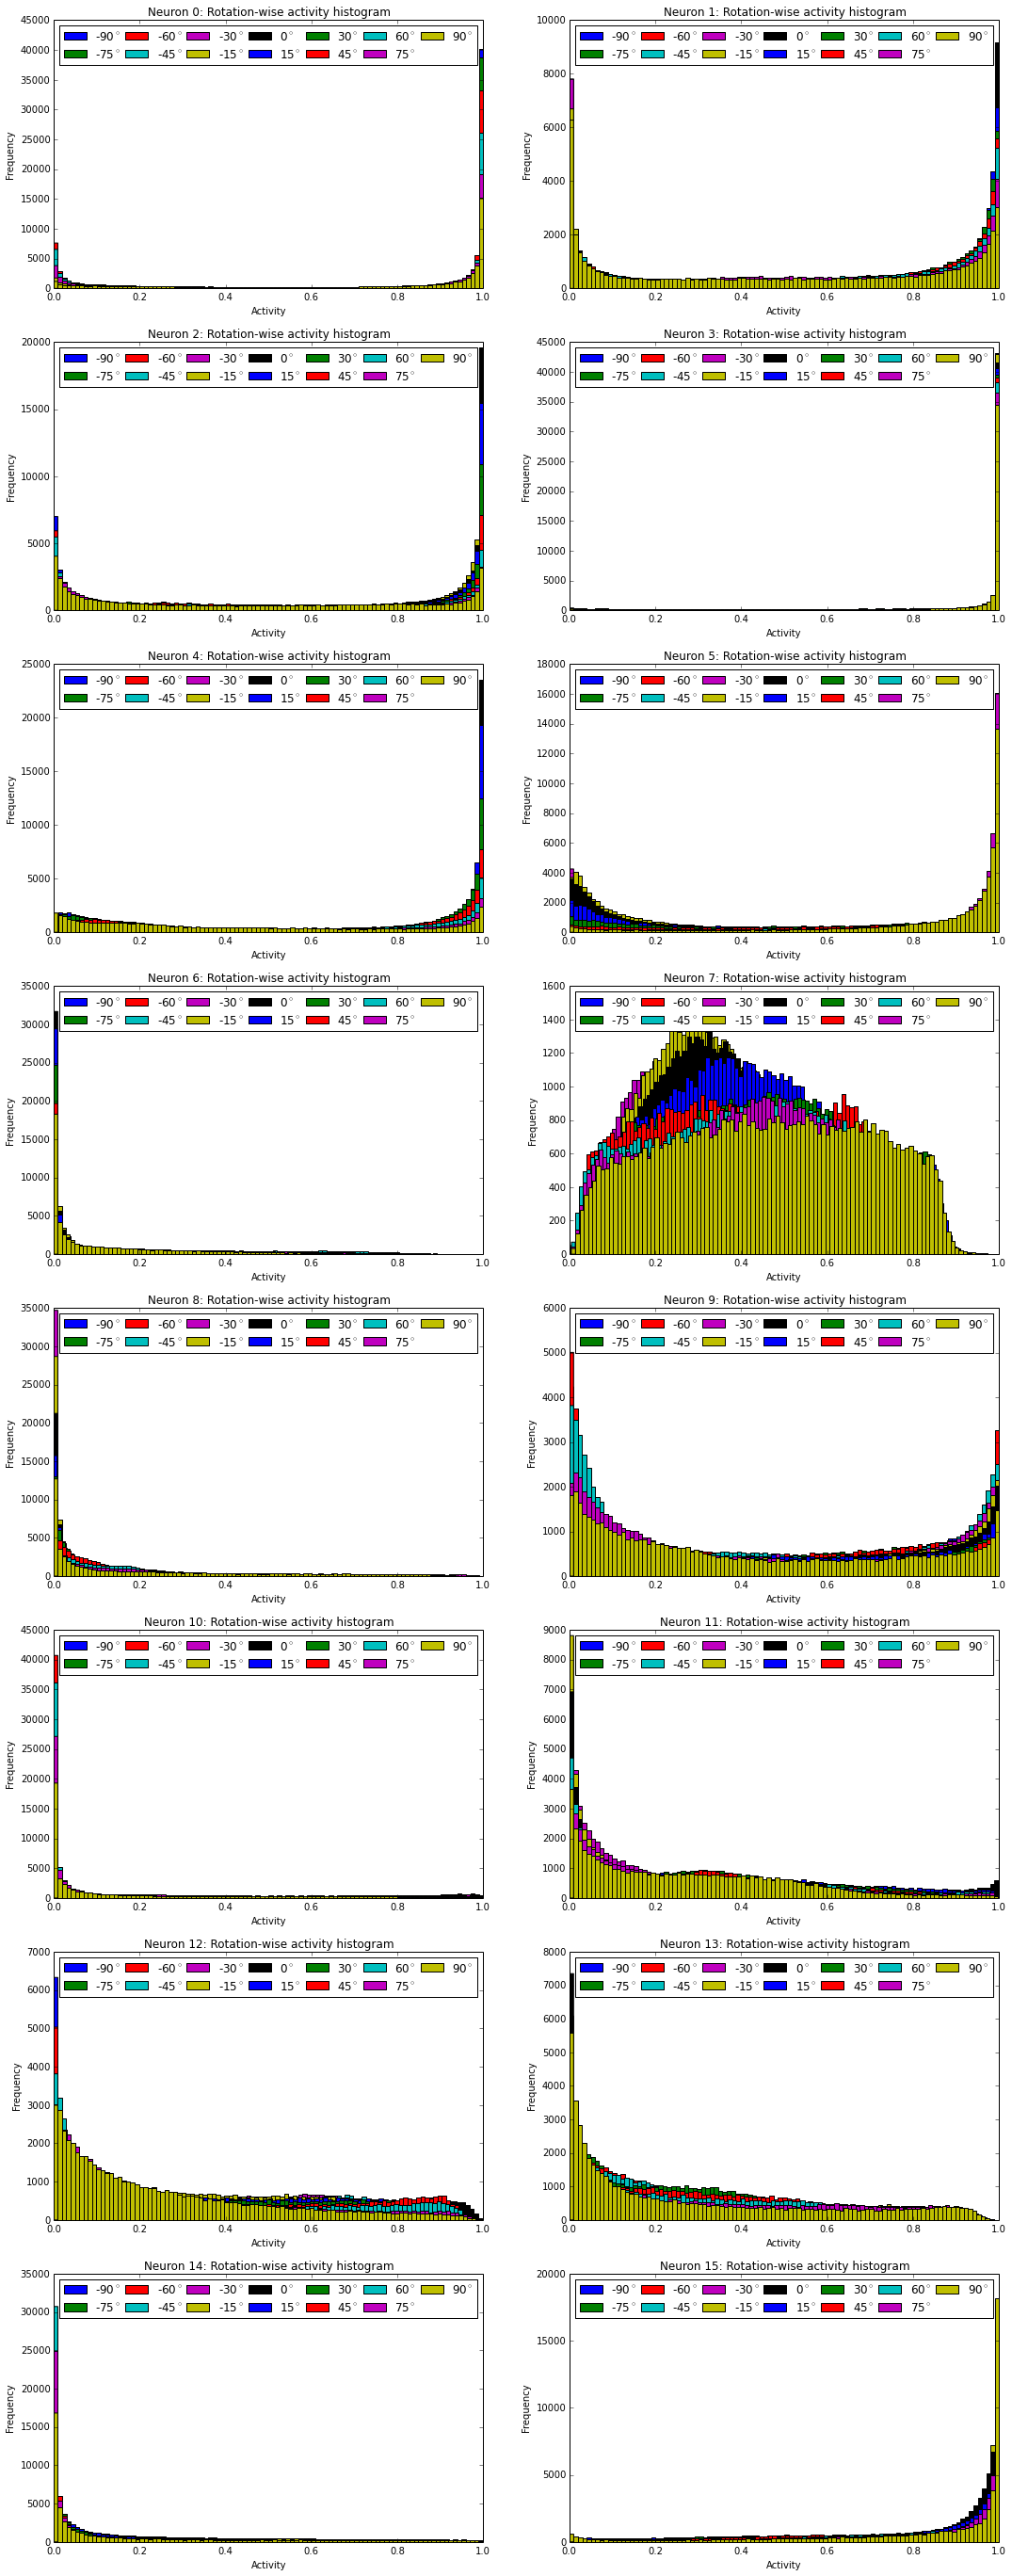

encode2neuron


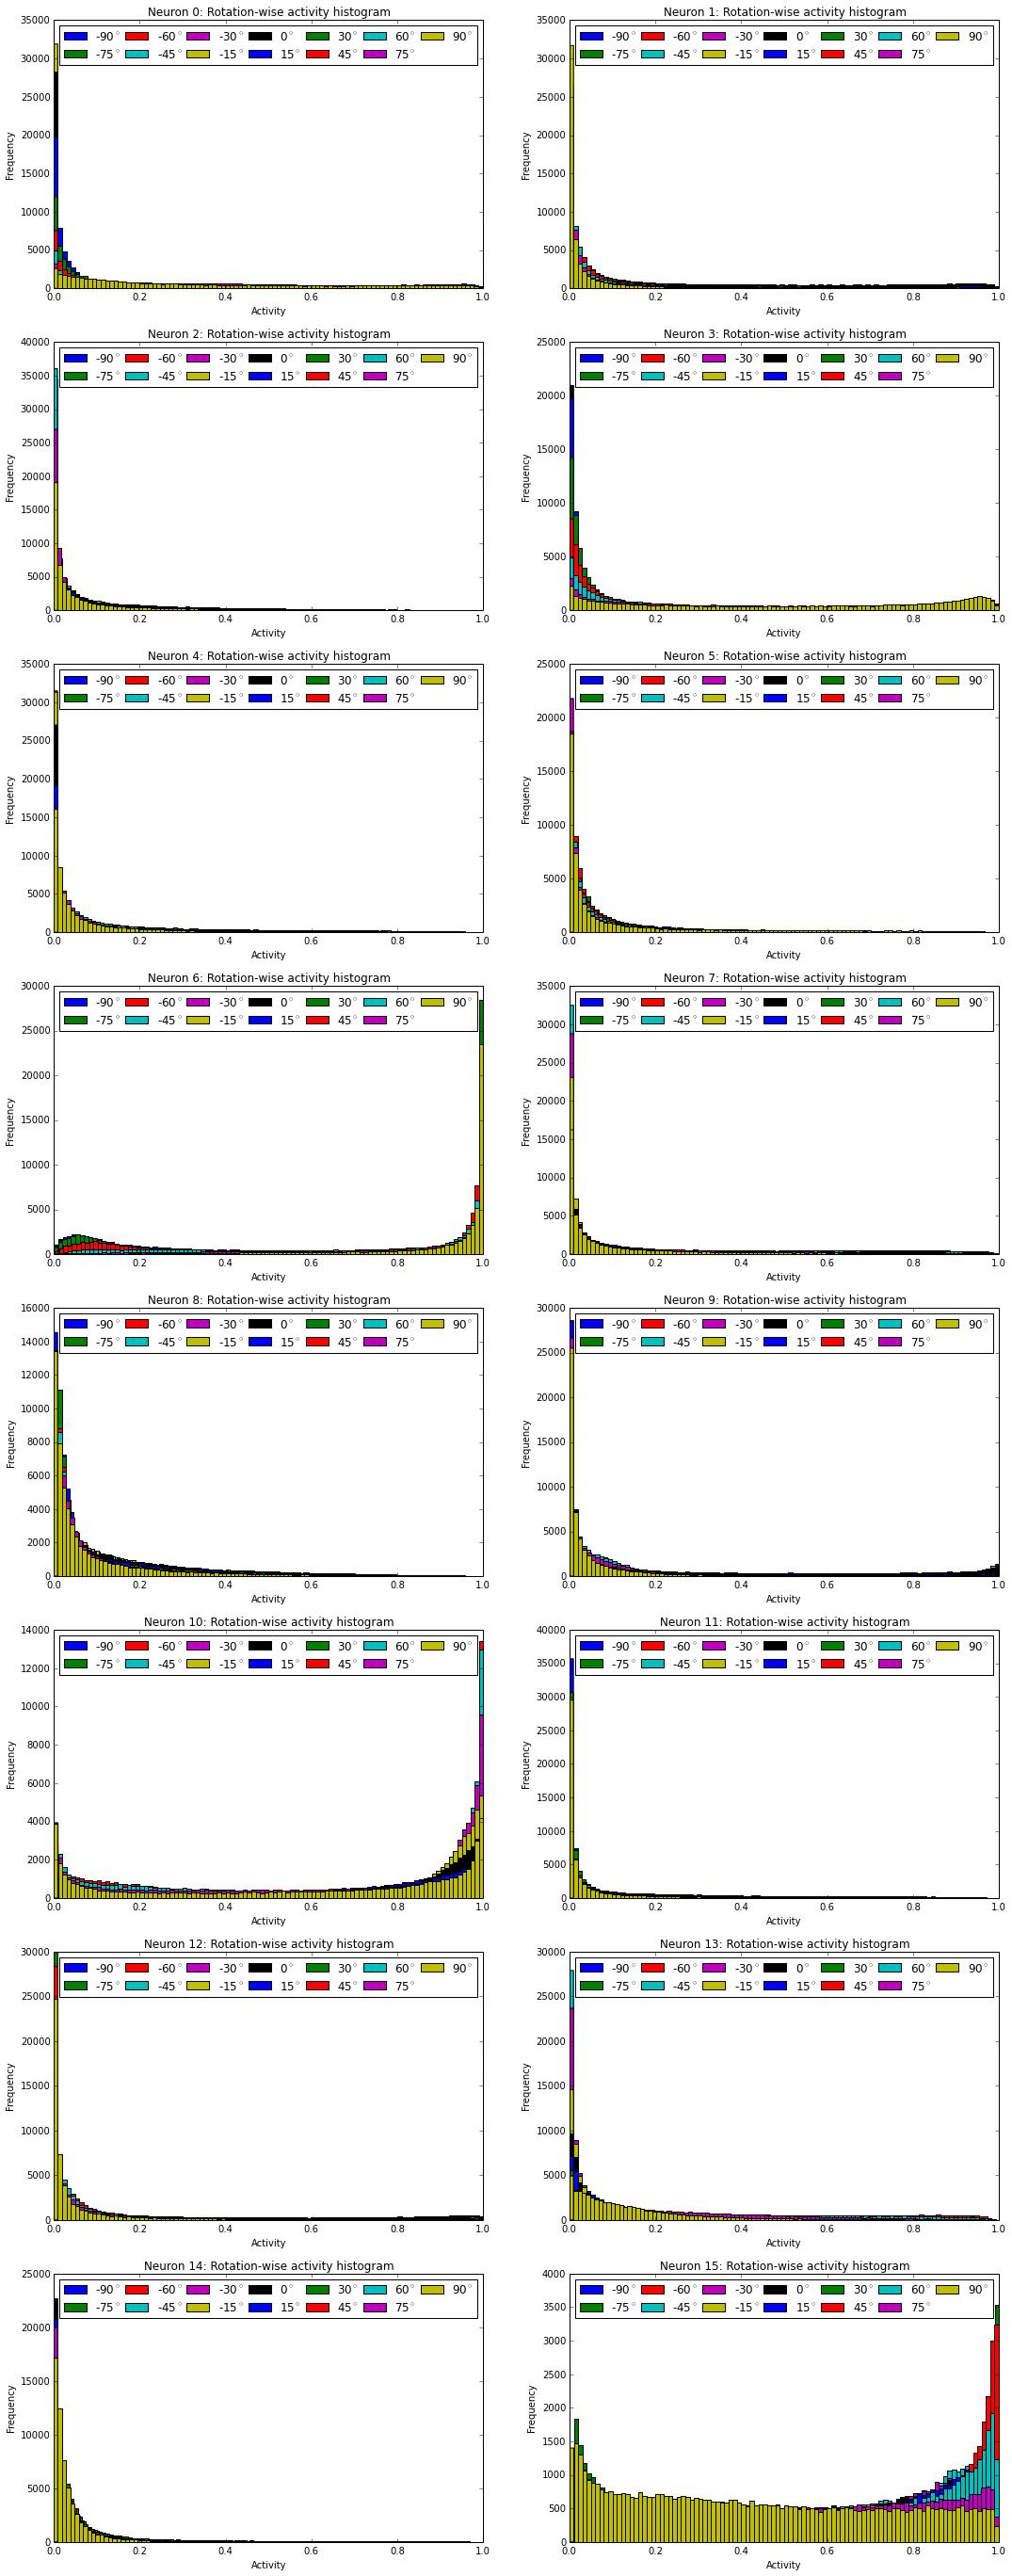

encode3neuron


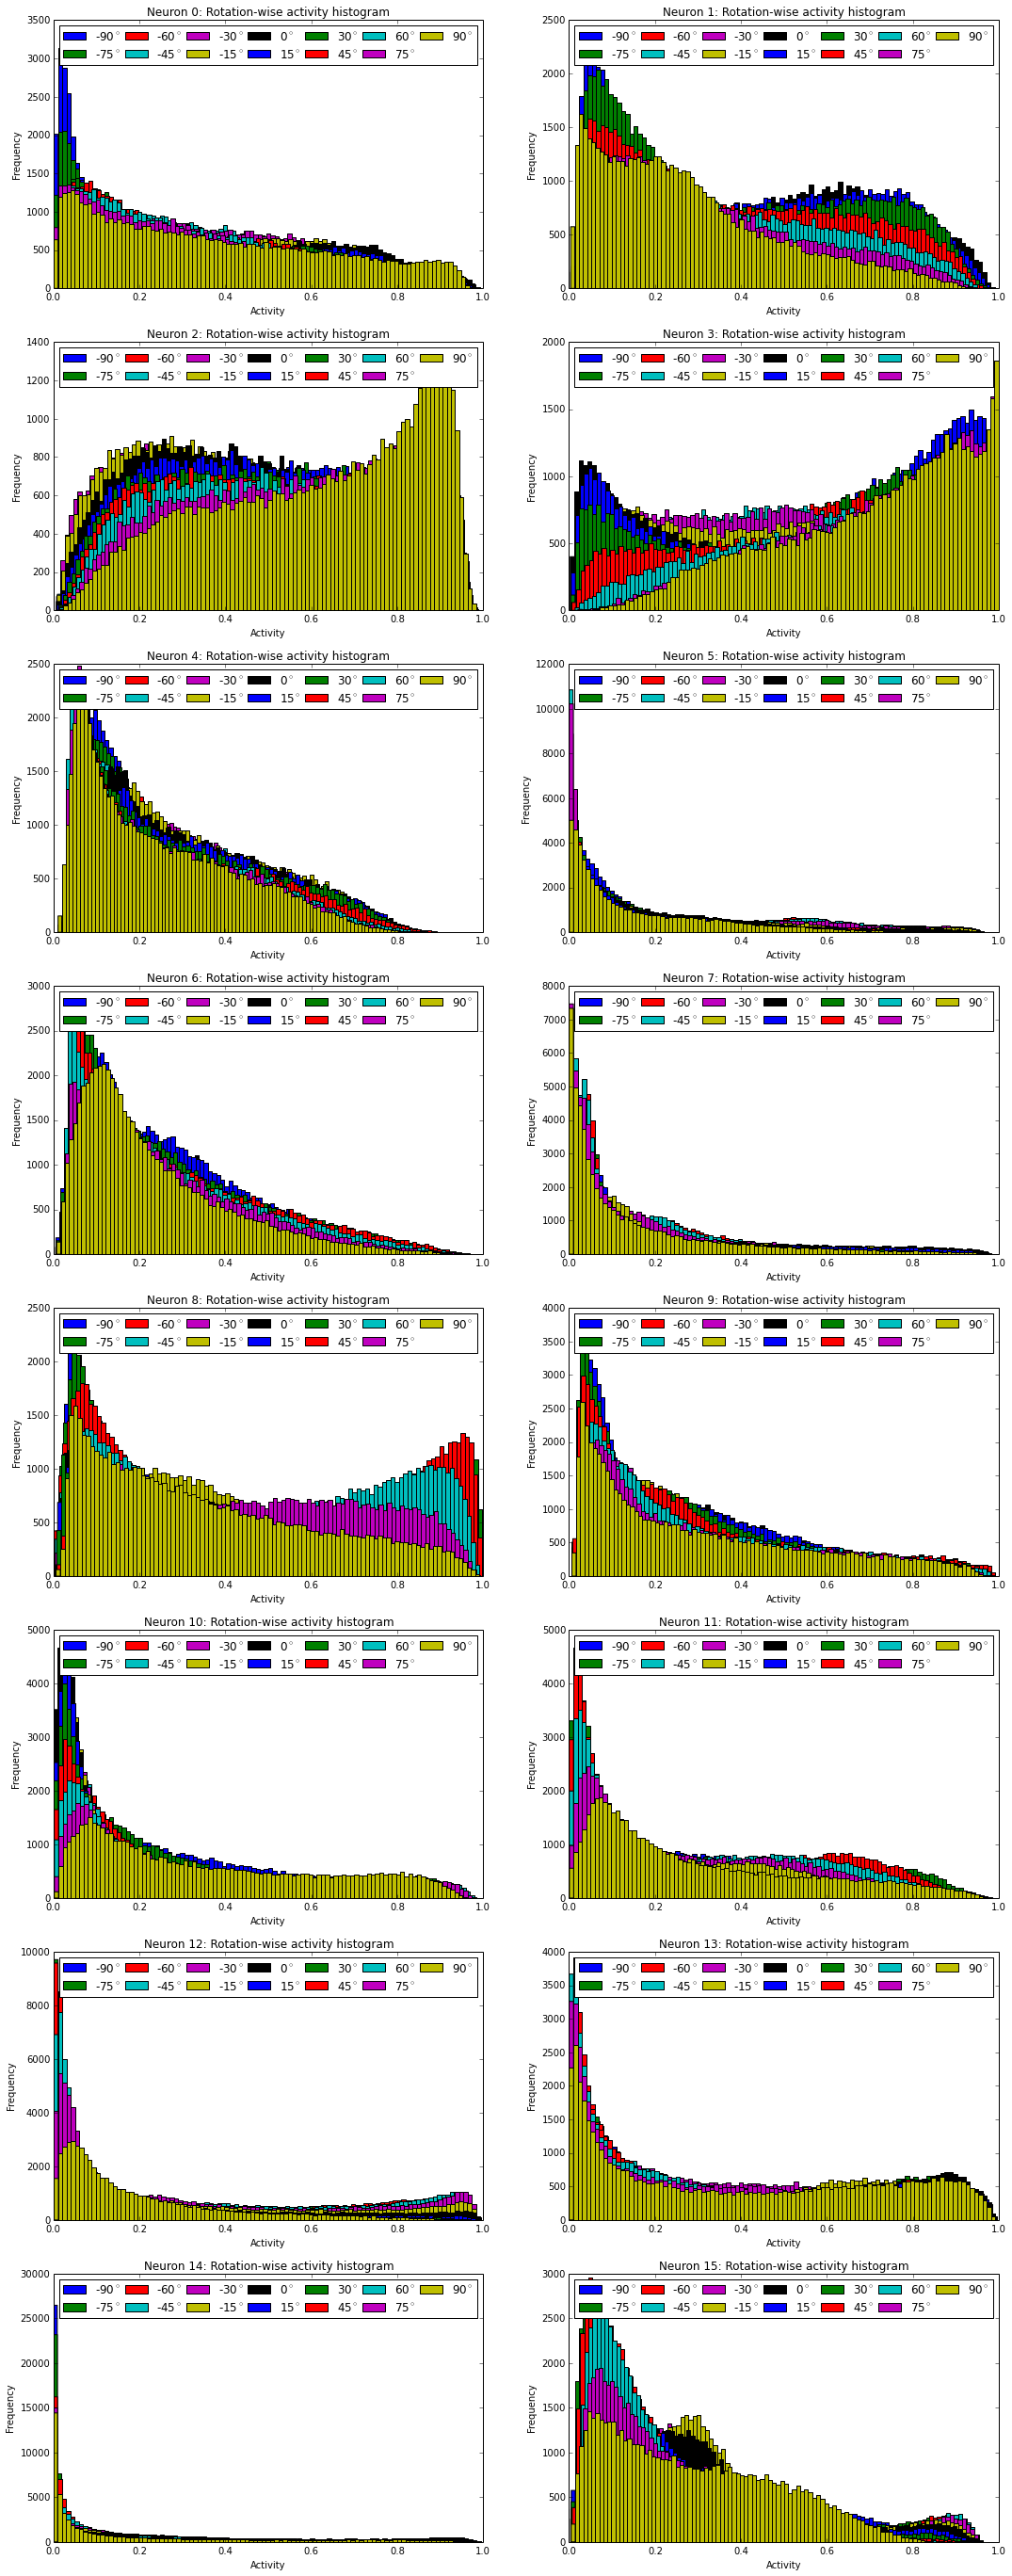

encode4neuron


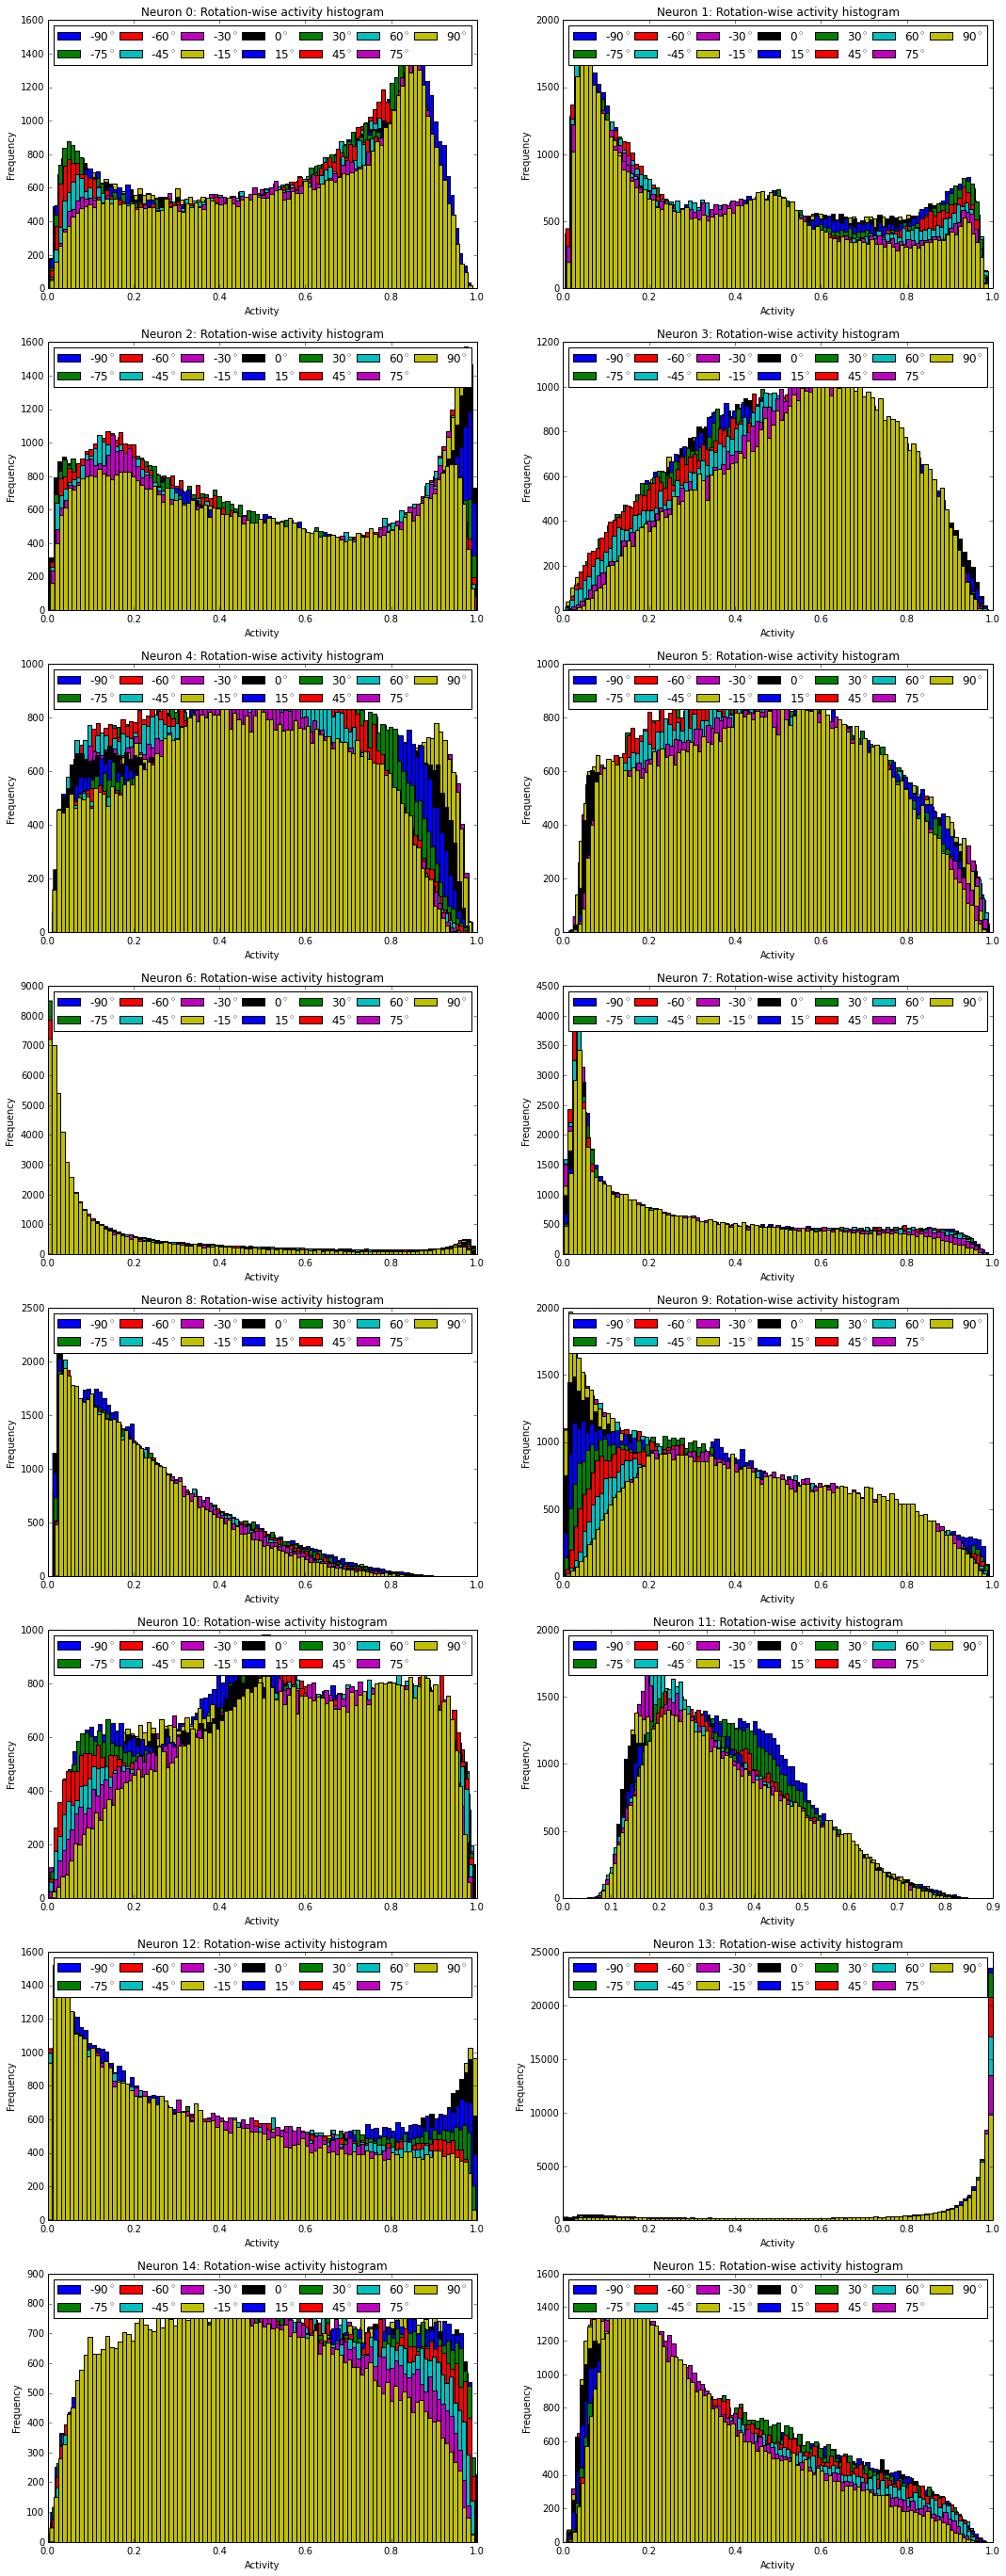

In [16]:
#ROTATION ANGLES
rot_lmdb_path =  '/mnt/raid/dnn/data_oliver/lmdb/MNIST_TRAIN_60000_rot_ang_lmdb/shuffled/'

lmdb_env = lmdb.open(rot_lmdb_path)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
R = []
im_count = 0
for key, value in lmdb_cursor:
        R.append(value)
Rot = np.asarray([float(r) for r in R])


for layer in ['encode1neuron','encode2neuron','encode3neuron','encode4neuron' ]:
    print(layer)
    for neuron_nr, v in enumerate(CL[layer].T):

        if neuron_nr%16 ==0:
            plt.figure(figsize= (18, 8*6))

        plt.subplot(8,2,neuron_nr + 1)
        #plt.subplot(4,28*7,neuron_nr + 1)
        #v = v
        #inds = np.argsort(v)
        #act_ord = v[inds]
        #rot_ord = Rot[inds]
        #plt.scatter(range(len(act_ord)),act_ord, c = rot_ord, marker = 'x', s=100)
        #plt.scatter(Rot[:1000],v, c = Rot[:1000], marker = 'x', s=100)

        l=[]
        angs = np.sort(list(set(Rot)))
        for ang in angs:
            plt.hist(v[Rot==ang], bins = 100)
            l.append('{:0.0f}$^\circ$'.format(ang))
        plt.legend(l, mode="expand", ncol=7)
        plt.title('Neuron {}: Rotation-wise activity histogram'.format(neuron_nr) )
        plt.xlabel('Activity')
        plt.ylabel('Frequency')
        if (neuron_nr+1)%16 == 0:
            plt.show()
            break

    
    
